The Python programming language is one of the most popular languages in both academia and industry.  It is heavily used in data science for simple data analysis and complex machine learning.  By most accounts, in the last few years, Python has eclipsed the R programming language in popularity for scientific/statistical computation.  Its popularity is due to intuitive and readable syntax that can be implemented in a powerful object oriented programming paradigm, if so desired, as well as being open source.  It is for these reasons that I decided to transcribe the Introduction to Simulation chapter in Pishro Nik's Introduction to Probability, Statistics and Random Processes book into Python.

This entire chapter was written in a Jupyter notebook, an interactive programming environment primarily for Python, that can be run locally in a web browser. Jupyter notebooks are ideal for quick and interactive data analysis, incorporating markdown functionality for clean presentations and code sharing.  If you are a fan of Rstudio, you will most likely be fond of Jupyter notebooks.  This entire notebook is available freely at [https://www.google.com](https://www.google.com).  

Additionally, much of this code was written using the Numpy/SciPy library, Python's main library for scientific computation and numerical mathematics.  Numpy has a relatively clear and well documented API ([https://docs.scipy.org/doc/numpy/reference/index.html](https://docs.scipy.org/doc/numpy/reference/index.html)), a reference which I utilize almost daily.

I start with a few basic imports, and define several functions I will use throughout the rest of this chapter.

In [810]:
#define html style element for notebook formatting
from IPython.core.display import HTML

with open('style.txt', 'r') as myfile:
    notebook_style = myfile.read().replace('\n', '')

HTML(notebook_style)

In [811]:
#import some relevant packages and plot inline
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [812]:
#define a few functions I will be using throughout the rest of the notebook

#function to print several of the RGNs to the screen
def print_vals(RNG_function, *args):
    for i in range(5):
        print('X_' + str(i)+' = ', RNG_function(*args))

In [813]:
#plotting function
def plot_results(x, y, xlim=None, ylim=None, xlabel=None, ylabel=None, \
                 title=None, labels=None):
    
    plt.figure(1, figsize = (6, 4))
    plt.rc('text', usetex=True)
    plt.rc('font', family = 'serif')
    
    if labels:
        plt.plot(x[0], y[0], label=labels[0], linewidth = 2)
        plt.plot(x[1], y[1], label=labels[1], linewidth = 2)
        plt.legend(loc='upper right')
    else:
        plt.plot(x, y, linewidth = 2)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    if xlabel:
        plt.xlabel(xlabel, size = 15)
    if ylabel:
        plt.ylabel(ylabel, size = 15)
    if title:
        plt.title(title, size=15)
    
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15);

 **Example 1.** (Bernoulli) Simulate tossing a coin with probability of heads p.

> *Solution:*  We can utilize the algorithm presented in the book, which uses random variables drawn from a $Unif(0,1)$ distribution.  The following function implements this algorithm in Python to generate a $Bern(p)$ (pseudo) random variable.

In [814]:
def draw_bern(p, N):
    """
    A Bern(p) pseudo-RNG
    """
    U = np.random.uniform(size = N)
    if N == 1: U = U[0]
    X = (U < p) + 0
    
    return X

In [815]:
#print a few examples of the RGNs to the screen
p = 0.5
print_vals(draw_bern, p, 1)

X_0 =  0
X_1 =  0
X_2 =  0
X_3 =  0
X_4 =  1


Note that we can directly sample from a $Bern(p)$ distribution with Numpy's binomial random number generator (RNG) by setting $n=1$ with: `np.random.binomial(1, p)`.

**Example 2.** (Coin Toss Simulation) Write code to simulate tossing a fair coin to see how the law of large numbers works.

> *Solution:*  I draw 1000 $Bern(0.5)$ random variables and compute the cumulative average.

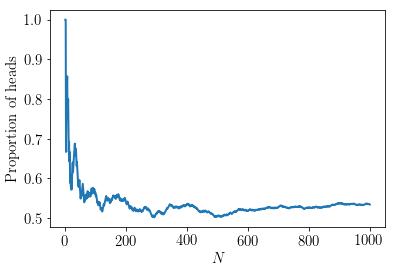

In [816]:
#generate data, compute proportion of heads and plot

#set a seed for reproducibility 
np.random.seed(2)

X = draw_bern(0.5, 1000)
avg = np.cumsum(X)/(np.arange(1000) + 1)
plot_results(np.arange(1000) + 1, avg, xlabel='$N$', ylabel='Proportion of heads')

#reset seed
np.random.seed(0) 

**Example 3.** (Binomial) Generate a $Bin(50, 0.2)$ random variable.

> *Solution:* If $X_1,X_2, \ldots,X_n$ are drawn $iid$ from a $Bern(p)$ distribution, then we can express a $Bin(n, p)$ random variable as $X = X_1+X_2+ \ldots +X_n$.  Therefore we can utilize the code we have already written for drawing a $Bern(p)$ random variable to draw a $Bin(n, p)$ random variable.

In [817]:
def draw_bin(n, p, N):
    """
    A Bin(n, p) pseudo-RNG
    """
    if N > 1:
        U = np.random.uniform(0, 1, (N, n))
        X = np.sum(U < p, axis = 1)

    else:
        U = np.random.uniform(0, 1, n)
        X = np.sum(U < p)
    
    return X

In [818]:
#print a few examples of the RGNs to the screen
n = 50
p = 0.2
print_vals(draw_bin, n, p, 1)

X_0 =  8
X_1 =  17
X_2 =  3
X_3 =  13
X_4 =  10


Note that we can directly sample from a $Bin(n, p)$ distribution with Numpy's binomial RNG with:
`np.random.binomial(n, p)`.

**Example 4.** Write an algorithm to simulate the value of a random variable X such that:
\begin{equation}  
    P_X(x) = 
    \begin{cases}
        0.35 & \text{for $x = 1$} \\
        0.15 & \text{for $x = 2$} \\
        0.4 & \text{for $x = 3$} \\
        0.1 & \text{for $x = 4$}.
    \end{cases} 
\end{equation}

> *Solution:*  We can utilize the algorithm presented in the book which divides the unit interval into 4 partitioned sets and uses a uniformly drawn random variable.

In [819]:
def draw_general_discrete(P, R_X, N):
    """
    A pseudo-RNG for any arbitrary discrete PMF specified by R_X and 
    corresponding probabilities P
    """
    F_X = np.cumsum([0] + P)
    
    X_arr = []
    U_arr = np.random.uniform(0, 1, size = N)
    for U in U_arr:
        X = R_X[np.sum(U > F_X)-1]

        #take care of edge case where U = 0
        if U == 0: 
            X = R_X[0]
        X_arr.append(X)
    if N == 1: X_arr = X_arr[0]
        
    return X_arr

In [820]:
#print a few examples of the RGNs to the screen
P = [0.35, 0.15, 0.4, .1]
R_X = [1, 2, 3, 4]
print_vals(draw_general_discrete, P, R_X, 1)

X_0 =  2
X_1 =  4
X_2 =  3
X_3 =  3
X_4 =  4


Note that we can directly sample from a discrete PMF using Numpy's multinomial RNG.  A multinomial distribution is the $k$ dimensional analogue of a binomial distribution, where $k>2$.  The multinomial distribution is a distribution over random vectors, $\boldsymbol{X}$ (of size $k$), where the entries in the vectors can take on values from $0, 1, \ldots n$, subject to $X_1+X_2+\ldots+ X_k = n$, where $X_i$ represents the $i^{th}$ component of $\boldsymbol X$.

If a binomial random variable represents the number of heads we flip out of $n$ coin tosses (where the probability of heads is $p$), then a multinomial random variable represents the number of times we roll a 1, the number of times we roll a 2, $\ldots$, the number of times we roll a k, when rolling a $k$ sided die $n$ times.  For each roll, the probability of rolling the $i^{th}$ face of the die is $p_i$ (where $\sum_{i=1}^k p_i =1$).  We store the value for the number times we roll the $i^{th}$ face of the die in $X_i$.  To denote a random vector drawn from a multinomial distribution, the notation, $\boldsymbol{X}\sim Mult(n, \boldsymbol{p})$, is typical, where $\boldsymbol{p}$ denotes the $k$ dimensional vector with the $i^{th}$ component of $\boldsymbol{p}$ given by $p_i$.

To directly sample from a discrete PMF with (ordered) range array `R_X` and associated probability array `P` we can use Numpy's multinomial RNG function by setting $n=1$ (one roll).  To sample one time we can use the code: `X = R_X[np.argmax(np.random.multinomial(1, pvals=P))]`, and to sample `N` times, we can use the code: `X = [R_X[np.argmax(x)] for x in np.random.multinomial(1, pvals=P, size=N)]`.

Additionally, to sample from an arbitrary discrete PMF, we can use Numpy's choice function, which samples randomly from a specified list, where each entry in the list is sampled according to a specified probability.  To sample `N` values from an array `R_X`, with corresponding probability array `P`, we can use the code: `X = np.random.choice(R_X, size=N, replace=True, p=P)`.  Make sure to specify `replace=True` to sample with replacement.


**Example 5.** (Exponential) Generate an $Exp(1)$ random variable.

> *Solution:*  Using the method of inverse transformation, as shown in the book, for a strictly increasing CDF, $F$, the random variable $X = F^{-1}(U)$, where $U \sim Unif(0,1)$, has distribution $X\sim F$.  Therefore, it is not difficult to show that,
\begin{equation}
    -\frac{1}{\lambda} \ln (U) \sim Exp(\lambda),
\end{equation}
where the fact that $1-U\sim Unif(0,1)$ has been used.


In [821]:
def draw_exp(lam, N):
    """
    An Exp(lambda) pseudo-RNG using the method of inverse transformation
    """
    U = np.random.uniform(0, 1, size = N)
    if N == 1:
        U = U[0]
    X = (-1/lam)*np.log(U)
    
    return X

In [822]:
#print a few examples of the RGNs to the screen
lam = 1
print_vals(draw_exp, lam, 1)

X_0 =  2.4838379957
X_1 =  0.593858616083
X_2 =  0.53703944167
X_3 =  0.0388069650697
X_4 =  1.23049637556


**Example 6.** (Gamma) Generate a $Gamma(20,1)$ random variable.

> *Solution:*  If  $X_1, X_2, \ldots, X_n$ are drawn iid from an $Exp(\lambda)$ distribution, then $Y = X_1+X_2+ \ldots+ X_n \sim Gamma(n, \lambda)$.  Therefore, to generate a $Gamma(n, \lambda)$ random variable, we need only to generate $n$ independent $Exp(\lambda)$ random variables and add them.

In [823]:
def draw_gamma(alpha, lam, N):
    """
    A Gamma(n, lambda) pseudo-RNG using the method of inverse transformation
    """
    n = alpha
    if N > 1:
        U = np.random.uniform(0, 1, size = (N, n))
        X = np.sum((-1/lam)*np.log(U), axis = 1)
    
    else:
        U = np.random.uniform(0, 1, size = n)
        X = np.sum((-1/lam)*np.log(U))
    
    return X

In [824]:
#print a few examples of the RGNs to the screen
alpha = 20
lam = 1
print_vals(draw_gamma, alpha, lam, 1)

X_0 =  17.4925086879
X_1 =  20.6155480241
X_2 =  26.9115218192
X_3 =  22.3654600391
X_4 =  22.331744631


**Example 7**. (Poisson) Generate a Poisson random variable. Hint: In this example, use the fact
that the number of events in the interval $[0, t]$ has Poisson distribution when the elapsed times
between the events are Exponential.

> *Solution:*  As shown in the book, we need only to continuously generate $Exp(\lambda)$ variables and count the number of draws it takes for the sum to be greater than 1.  The Poisson random variable is then the count minus 1.

In [825]:
def draw_poiss(lam, N):
    """
    A Poiss(lambda) pseudo-RNG
    """
    X_list = []
    
    for _ in range(N):
        summ = 0
        count = 0
        while summ <= 1:
            summ += draw_exp(lam, 1)
            count += 1
        X_list.append(count-1)

    if  N == 1: 
        return X_list[0]
    else: 
        return X_list

In [826]:
#print a few examples of the RGNs to the screen
lam = 1
print_vals(draw_poiss, lam, 1)

X_0 =  0
X_1 =  2
X_2 =  2
X_3 =  1
X_4 =  2


Note that we can directly sample from a $Poiss(\lambda)$ distributions with Numpy's: `np.random.poisson(lam)` function.



**Example 8.**  (Box-Muller) Generate 5000 pairs of normal random variables and plot both
histograms.
> *Solution*: Using the Box-Muller transformation as described in the book:

In [827]:
def draw_gaus_pairs(N):
    """
    An N(0, 1) pseudo-RNG to draw N pairs of indepedent using the Box-Muller 
    transformation
    """
    U1 = np.random.uniform(size = N)
    U2 = np.random.uniform(size = N)

    Z1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    Z2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)


    return (Z1, Z2)

In [828]:
#print a few examples of the RGNs to the screen
Z1_arr, Z2_arr = draw_gaus_pairs(5)

for i, (Z1, Z2) in enumerate(zip(Z1_arr, Z2_arr)):
    print('(Z_1, Z_2)_' + str(i)+' = (', Z1, Z2, ')')

(Z_1, Z_2)_0 = ( 0.722134435205 -0.189448731182 )
(Z_1, Z_2)_1 = ( -0.918558147113 0.247330492682 )
(Z_1, Z_2)_2 = ( -1.42078058592 -0.914027516141 )
(Z_1, Z_2)_3 = ( 1.19799155228 -1.49105841693 )
(Z_1, Z_2)_4 = ( -0.65055423687 0.179187077215 )


In addition to plotting the histograms (plot in the first panel below) I also make a scatter plot of the 2 Gaussian random variables.  The Box-Muller method produces pairs of independent random variables, and indeed, in the plot we see a bivariate Normal distribution with no correlation, i.e., it is an axis-aligned (recall that independence $\implies \rho = 0$).  I further compute the correlation coefficient between $Z_1$ and $Z_2$ and it is indeed very close to 0.

correlation coefficient =  0.0177349514518


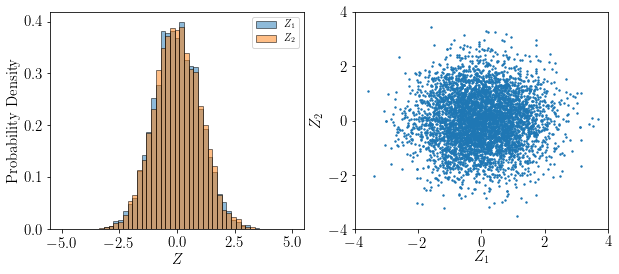

In [829]:
#plot the histograms and scatter plot

#set seed for reproducibility 
np.random.seed(8)

#generate data
Z1_arr, Z2_arr = draw_gaus_pairs(5000)

#plot histograms
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

bins = np.linspace(-5, 5, 50)
ax1.hist(Z1_arr, bins, alpha=0.5, normed=1, label='$Z_1$', edgecolor = 'black')
ax1.hist(Z2_arr, bins, alpha=0.5, normed=1, label='$Z_2$', edgecolor = 'black')
ax1.legend(loc='upper right')
ax1.set_xlabel('$Z$', size = 15)
ax1.set_ylabel('Probability Density', size = 15)
ax1.tick_params(labelsize=15)

#plot scatter plot
ax2.scatter(Z1_arr, Z2_arr, s=2)
ax2.set_xlabel('$Z_1$', size = 15)
ax2.set_ylabel('$Z_2$', size = 15)
ax2.set_ylim((-4, 4))
ax2.set_xlim((-4, 4))
ax2.tick_params(labelsize=15)

print('correlation coefficient = ', np.corrcoef(Z1_arr, Z2_arr)[0, 1])

#reset seed
np.random.seed(0)

Note that we can directly sample from a $\mathcal N(0, 1)$ distribution with Numpy's normal RNG with: `np.random.randn(d0, d1, ..., dn)`, where `d0`, `d1`, ..., `dn` are the dimensions of the desired output array.


**Exercise 1**. Write Python programs to generate $Geom(p)$ and $Pascal(m, p)$ random variables.

> *Solution*: As in the book, I generate $Bern(p)$ random variables until the first success and count the number of draws to generate a $Geom(p)$ random variable.  To generate a $Pascal(m, p)$ random variable, I generate $Bern(p)$ random variables until I obtain $m$ successes and count the number of draws.

In [830]:
def draw_geom(p, N):
    """
    A Geom(p) pseudo-RNG
    """
    X_list = []
    for _ in range(N):

        count = 0
        X = 0
        while X == 0:
            X = draw_bern(p, 1)
            count += 1
        X_list.append(count)

    if  N == 1: 
        return X_list[0]
    else: 
        return X_list


In [831]:
#print a few examples of the RGNs to the screen
p = 0.2
print_vals(draw_geom, p, 1)

X_0 =  15
X_1 =  1
X_2 =  1
X_3 =  8
X_4 =  2


In [832]:
def draw_pascal(m, p, N):
    """
    A Pascal(m, p) pseudo-RNG
    """
    X_list = []
    for _ in range(N):
        count_succ = 0
        count = 0
        while count_succ < m:
            X = draw_bern(p, 1)
            count_succ += X
            count += 1
        X_list.append(count)
            
    if  N == 1: 
        return X_list[0]
    else: 
        return X_list

In [833]:
#print a few examples of the RGNs to the screen
p = 0.2
m=2
print_vals(draw_pascal, m, p, 1)

X_0 =  17
X_1 =  10
X_2 =  7
X_3 =  3
X_4 =  4


Note that we can directly sample from $Geom(p)$ and $Pascal(m, p)$ distributions with Numpy's: `np.random.geometric(p)` and `np.random.negative_binomial(n, p)` functions respectively.

**Exercise 2**. (Poisson) Use the algorithm for generating discrete random variables to obtain a Poisson
random variable with parameter $\lambda = 2$.

> *Solution*:

In [834]:
from scipy.misc import factorial

def draw_poiss2(lam, N):
    """
    A Poiss(lambda) pseudo-RNG using the method to generate an 
    arbitrary discrete random variable
    """
    X_list = []
    for _ in range(N):
        P = np.exp(-lam)
        i = 0
        U = np.random.uniform()
        while U >= P:
            i += 1
            P += np.exp(-lam)*lam**i/(factorial(i)+0)

        X_list.append(i)

    if  N == 1: 
        return X_list[0]
    else: 
        return X_list

In [835]:
#print a few examples of the RGNs to the screen
lam = 2
print_vals(draw_poiss2, 2, 1)

X_0 =  3
X_1 =  0
X_2 =  5
X_3 =  2
X_4 =  5


**Exercise 3**. Explain how to generate a random variable with the density
\begin{equation}
    f(x) = 2.5x\sqrt{x}
\end{equation}
for $0 < x < 1$.

> *Solution*: The CDF is given by $F_X(x) = 2.5\int_0^{x} {x^\prime}^{3/2}dx^\prime = x^{5/2}$, and therefore $F_X^{-1}(x) = x^{2/5}$.  Using the method of inverse transformation, if $U\sim Unif(0, 1)$, then $F_X^{-1}(U)$ is distributed according to the desired distribution.





In [836]:
def draw_dist3():
    """
    A pseudo-RNG for the distribution in Exercise 3
    """
    U = np.random.uniform()
    return U**(0.4)

In [837]:
#print a few examples of the RGNs to the screen
print_vals(draw_dist3)

X_0 =  0.8178201131579468
X_1 =  0.8861754700680049
X_2 =  0.27369087549414306
X_3 =  0.6033871249144047
X_4 =  0.4285059109745954


**Exercise 4**. Use the inverse transformation method to generate a random variable having distribution
function
\begin{equation}
F_X(x) = \frac{x^2+x}{2},
\end{equation}
for $0 \le x \le 1$.

> *Solution*: By inverting the CDF, we have that.
\begin{equation}
F_X^{-1}(x) = -\frac{1}{2} +\sqrt{\frac{1}{4}+2x},
\end{equation}
for $0 \le x \le 1$.


In [838]:
def draw_dist4():
    """
    A pseudo-RNG for the distribution in Exercise 4
    """
    U = np.random.uniform()
    return -0.5 + np.sqrt(0.25 + 2*U)

In [839]:
#print a few examples of the RGNs to the screen
print_vals(draw_dist4)

X_0 =  0.417758353296
X_1 =  0.198180089883
X_2 =  0.441257859881
X_3 =  0.538521058539
X_4 =  0.115056902


**Exercise 5**. Let $X$ have a standard Cauchy distribution.
function
\begin{equation}
F_X(x) = \frac{1}{\pi} \arctan x +\frac{1}{2}.
\end{equation}

Assuming you have $U ∼ Unif(0, 1)$, explain how to generate $X$. Then, use this result
to produce 1000 samples of $X$ and compute the sample mean. Repeat the experiment 100
times. What do you observe and why?

> *Solution*: The inverse CDF is given by $F_X^{-1}(x) = \tan [\pi(x -1/2)]$.

In [840]:
def draw_stand_cauchy(N):
    """
    A standard Cauchy pseudo-RNG using the method of inverse transformation
    """
    U = np.random.uniform(size = N)
    X = np.tan(np.pi*(U - 1/2))
    
    if N == 1: return X[0]
    else: return X

In [841]:
#print a few examples of the RGNs to the screen
print_vals(draw_stand_cauchy, 1)

X_0 =  0.691013110859
X_1 =  0.212342443875
X_2 =  -0.907695727473
X_3 =  0.0731660554841
X_4 =  -3.28946953204


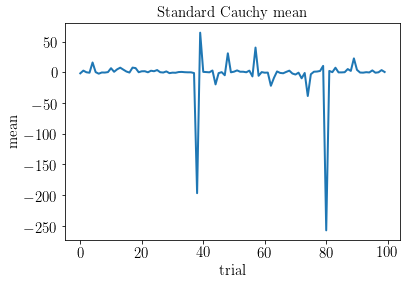

In [842]:
#plot means for 100 trials

#set seed for reproducibility 
np.random.seed(5)

#compute means and plot
means = [np.mean(np.array(draw_stand_cauchy(1000))) for _ in range(100)]

plot_results(range(100), means, xlabel='trial', ylabel='mean', \
             title='Standard Cauchy mean')

#reset seed
np.random.seed(0)

We see that the means for each trial vary wildly.  This is because the Cauchy distribution actually has no mean.

**Exercise 6**. (The Rejection Method) When we use the Inverse Transformation Method, we need a simple form of the cdf $F(x)$ that allows direct computation of $X = F^{-1}(U)$.  When $F(x)$ doesn’t have a simple form but the pdf $f(x)$ is available, random variables with density $f(x)$ can be generated by the rejection method. Suppose you have a method
for generating a random variable having density function $g(x)$. Now, assume you want to generate a random variable having density function $f(x)$. Let $c$ be a constant such that $f(y)/g(y) \le c$ (for all $y$).  Show that the following method generates a random variable, $X$, with density function $f(x)$.

 
> 1) initialize $U$ and $Y$ such that $U \le \frac{f(Y)}{cg(Y)}$

**repeat** until $U \le \frac{f(Y)}{cg(Y)}$ $\big \{$ 

> 2) Generate $Y$ having density $g$

> 3) Generate a random number $U$ from $Unif(0, 1)$

$\big \}$

> 4) Set X = Y

> *Solution*:

First note that, as a technical matter, $c\ge 1$, which can be shown by integrating both sides of $f(y)/g(y) \le c$.

We see that this algorithm keeps iterating until it outputs a random variable $Y$, given that we know that $U \le \frac{f(Y)}{cg(Y)}$.  Therefore, the goal is to show that the random variable $Y|U \le \frac{f(Y)}{cg(Y)}$ has PDF $f(y)$ (or equivalently CDF $F(y)$).  In other words, we must show that $P\left(Y \le y \big|U \le \frac{f(Y)}{cg(Y)}\right) = F(y)$.  I show this with Baye's rule:

\begin{align}
P\left(Y \le y \big | U \le \frac{f(Y)}{c g(Y)}\right) & = \frac{P\left(U \le \frac{f(Y)}{c g(Y)} \big| Y \le y\right) P(Y \le y)}{P \left(U \le \frac{f(Y)}{c g(Y)}\right)} \\
&=\frac{P\left(U \le \frac{f(Y)}{c g(Y)}\big| Y \le y\right) G(y)}{P \left(U \le \frac{f(Y)}{c g(Y)}\right)}.
\end{align}
Thus, we must calculate the quantities: $P\left(U \le \frac{f(Y)}{c g(Y)}\big| Y \le y\right)$ and $P \left(U \le \frac{f(Y)}{c g(Y)}\right)$.

First note that 
\begin{align}
P\left(U \le \frac{f(Y)}{c g(Y)}\Big |Y = y\right) & = P\left(U \le \frac{f(y)}{c g(y)}\Big |Y = y\right) \\
& = P\left(U \le \frac{f(y)}{c g(y)}\right) \\
& = F_U\left(\frac{f(y)}{c g(y)}\right) \\
& = \frac{f(y)}{c g(y)},
\end{align}
where in the second line I have used that $U$ and $Y$ are independent and in the fourth I have used the fact that for a uniform distribution $F_U(u) = u$.  Notice that the requirement that $f(y)/g(y) \le c$ (for all $y$) is crucial at this step.  This is because $f(y)/g(y) \le c \implies c>0$ (since $f(y)$ and $g(y)$ are positive), so that $0 < f(y)/cg(y) \le 1$.  If this condition did not hold, then the above expression would be $\min \{1, \frac{f(y)}{c g(y)} \}$, for positive $c$ and 0 for negavtive $c$, which would interfere with the rest of the derivation.

I may now calculate $P \left(U \le \frac{f(Y)}{c g(Y)}\right)$:

\begin{align}
P \left(U \le \frac{f(Y)}{c g(Y)}\right) &= \int_{-\infty}^{\infty} P \left(U \le \frac{f(Y)}{c g(Y)}\Big|Y=y\right)g(y)dy \\
&= \int_{-\infty}^{\infty} \frac{f(y)}{c g(y)}g(y)dy \\
&= \frac{1}{c}\int_{-\infty}^{\infty} f(y)dy \\
&= \frac{1}{c}.
\end{align}

I now calculate the remaining quantity:
\begin{align}
P \left(U \le \frac{f(Y)}{c g(Y)}\big| Y \le y\right) &= \frac{P \left(U \le \frac{f(Y)}{c g(Y)},Y \le y\right)}{G(y)} \\
&=\frac{\int_{-\infty}^\infty P \left(U \le \frac{f(Y)}{c g(Y)},Y \le y \big | Y =v\right) g(v)dv}{G(y)} \\
&=\frac{\int_{-\infty}^\infty P \left(U \le \frac{f(Y)}{c g(Y)} \big|Y \le y,  Y =v\right) P(Y\le y| Y=v) g(v)dv}{G(y)},
\end{align}
where in the second line I have used the law of total probability and in the third I have used the chain rule of probability.  Note that:

\begin{equation}  
    P(Y \le y|Y=v) = 
    \begin{cases}
        1 & \text{for $v \le y$} \\
        0 & \text{for $v>y$},
    \end{cases} 
\end{equation}

and thus
\begin{align}
P \left(U \le \frac{f(Y)}{c g(Y)}\big| Y \le y\right) &= \frac{P \left(U \le \frac{f(Y)}{c g(Y)},Y \le y\right)}{G(y)} \\
&=\frac{\int_{-\infty}^y P \left(U \le \frac{f(Y)}{c g(Y)} \big|Y \le y,  Y =v\right)g(v)dv}{G(y)} \\
&=\frac{\int_{-\infty}^y P \left(U \le \frac{f(Y)}{c g(Y)} \big|Y =v\right)g(v)dv}{G(y)} \\
&=\frac{\int_{-\infty}^y \frac{f(v)}{c g(v)}g(v)dv}{G(y)} \\
&=\frac{\frac{1}{c}F(y)}{G(y)},
\end{align}
where in the third line I have used the fact that conditioning on $Y=v$ already implies that $Y \le y$ since we only consider values of $v$ less than or equal to $y$ in the integration.  In fourth line I have used the expression for $P\left(U \le \frac{f(Y)}{c g(Y)}\Big |Y = y\right)$ that we derived above.

Inserting these quantities into Baye's rule:

\begin{align}
P\left(Y \le y \big | U \le \frac{f(Y)}{c g(Y)}\right) &=\frac{P\left(U \le \frac{f(Y)}{c g(Y)}\big| Y \le y\right) G(y)}{P \left(U \le \frac{f(Y)}{c g(Y)}\right)} \\ 
& = \frac{\frac{\frac{1}{c}F(y)}{G(y)} G(y)}{\frac{1}{c}} \\
& = F(y),
\end{align}
which is what we set out to prove.


**Exercise 7**.  Use the rejection method to generate a random variable having density function Beta(2, 4). Hint: Assume g(x) = 1 for 0 < x < 1.

> *Solution:* I first visualize these distributions so we can get a handle on what we are dealing with.

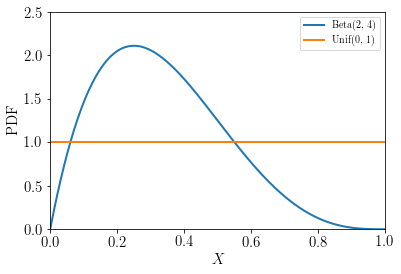

In [843]:
#plot Beta(2, 4) and Unif(0, 1)
from scipy.stats import beta

x1, x2 = np.linspace(0, 1, 1000), np.linspace(0, 1, 1000)
y1, y2 = beta.pdf(x1, 2, 4), x2*0+1
labels = ['Beta(2, 4)', 'Unif(0, 1)']

plot_results([x1, x2], [y1, y2], xlim=(0, 1), ylim=(0, 2.5), xlabel='$X$', \
             ylabel='PDF', labels=labels)

Since $f(x)/g(x)$ (where $f(x)$ is the PDF of the Beta and $g(x)$ is the PDF of the uniform) needs to be smaller than $c$ for all $x$ in the support of these distributions, a fine value of $c$ to use would be 2.5 since it is evident from the plot that this value satisfies the requirement.  The book uses the smallest possible value of $c$, i.e., the max of the $Beta(2, 4)$ distribution, which it derives analytically and finds to be $135/64 \approx 2.11$.  It is not necessary to use the smallest value of $c$, but will certainly help the speed of the algorithm since the algorithm only stops when $U \le f(Y)/cg(Y)$.  I will stick with the value of $2.5$ just to illustrate that the algorithm works for this value as well. 

In [844]:
def draw_beta_2_4(N):
    """
    A Beta(2, 4) pseudo-RNG using the rejection method
    """
    c=2.5
    
    X_list = []
    for _ in range(N):
        
        U = 1
        f_Y = 0
        g_Y =1

        while U > f_Y/(c*g_Y):
            Y = np.random.uniform()
            U = np.random.uniform()

            f_Y = 20*Y*(1-Y)**3
            g_Y = 1
            
        X_list.append(Y)

    if  N == 1: 
        return X_list[0]
    else: 
        return X_list

In [845]:
#print a few examples of the RGNs to the screen
print_vals(draw_beta_2_4, 1)

X_0 =  0.4236547993389047
X_1 =  0.07103605819788694
X_2 =  0.11827442586893322
X_3 =  0.5218483217500717
X_4 =  0.26455561210462697


**Exercise 8**.  Use the rejection method to generate a random variable having the $Gamma(5/2, 1)$ density function.  Hint: Assume $g(x)$ is the PDF of the $Gamma(1, 2/5)$.
> Solution: Note that there is a mistake in the phrasing of the question in the book.  The PDF for $g(x)$ should be $Gamma(1, 2/5)$, *not* $Gamma(5/2, 1)$.  Also note that we cannot use the method that we used in **Example**, 6. since in this case $\alpha$ is not an integer (however, we can use that method to draw from g(x)).  I first visualize these distributions so we can get a handle on what we are dealing with.

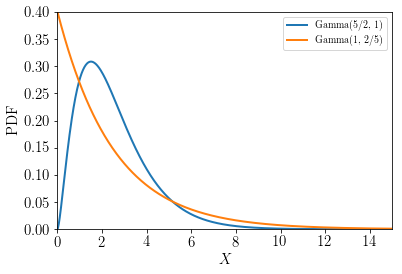

In [846]:
#plot Gamma(5/2, 1) and Gamma(1, 2/5)

x1, x2 = np.linspace(0, 20, 1000), np.linspace(0, 20, 1000)
f, g = (4/(3*np.sqrt(np.pi)))*(x1**1.5)*np.exp(-x1), 0.4*np.exp(-0.4*x2)
labels = ['Gamma(5/2, 1)', 'Gamma(1, 2/5)']


plot_results([x1, x2], [f, g], xlim=(0, 15), ylim=(0, 0.4), xlabel='$X$', \
             ylabel='PDF', labels=labels)

The $\ max\{ f(x)/g(x) \}$ for $x >0$ is approximately given by:

In [847]:
np.max(f/g)

1.6587150033103788

As a sanity check, this value is very close to the analytically derived value in the book, which is$\frac{10}{3 \sqrt{\pi}} \left(\frac{5}{2}\right)^{3/2} \exp(-3/2) \approx 1.6587162$.  Therefore, I set the value of $c$ to be 1.7, and use the function I wrote for **Example**. 6, `draw_gamma(alpha, lam, N)` to draw from $g(x)$.

In [848]:
def draw_gamma_2(alpha, lam, N):
    """
    A Gamma(5/2, 1) pseudo-RNG using the rejection method
    """
    c=1.7
    
    X_list = []
    for _ in range(N):
        
        U = 1
        f_Y = 0
        g_Y =1

        while U > f_Y/(c*g_Y):
            Y = draw_gamma(1, 0.4, 1)
            U = np.random.uniform()

            f_Y = (4/(3*np.sqrt(np.pi)))*(Y**1.5)*np.exp(-Y)
            g_Y = 0.4*np.exp(-0.4*Y)
            
        X_list.append(Y)

    if  N == 1: 
        return X_list[0]
    else: 
        return X_list

In [849]:
#print a few examples of the RGNs to the screen
print_vals(draw_gamma_2, 5/2, 1, 1)

X_0 =  1.96233211971
X_1 =  1.22716649756
X_2 =  2.55754781375
X_3 =  0.900161721137
X_4 =  3.89706921546


**Exercise 9**.  Use the rejection method to generate a standard normal random variable. Hint: Assume
$g(x)$ is the pdf of the exponential distribution with $\lambda = 1$.

> *Solutuion* As in the book, to solve this problem, I use the rejection method to sample from a half Gaussian:
\begin{equation}
    f(x) = \frac{2}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}},
\end{equation}
with range $(0, \infty)$, with an $Exp(1)$ distribution for $g(x)$.  The book analytically computes $\max \{f(x)/g(x) \}$ to be $\sqrt{2 e/\pi} \approx 1.32$, and I thus use $c=4$.  Once the algorithm is able to sample from the half Gaussian, to turn this distribution into a full Gaussian with range $\mathbb R$, one need only to randomly multiply by -1.  I therefore sample $Q$ ($\in \{0, 1\}$) from a $Bern(0.5)$ distribution and multiply by 1-2Q ($\in \{-1, 1\}$) in order to sample from the full Gaussian.

In [850]:
def draw_standard_normal(N):
    """
    A standard normal pseudo-RNG using the rejection method
    """
    c=1.4
    
    X_list = []
    for _ in range(N):
        
        U = 1
        f_Y = 0
        g_Y =1

        while U > f_Y/(c*g_Y):
            Y = draw_exp(1, 1)
            U = np.random.uniform()

            f_Y = (2/np.sqrt(2*np.pi))*np.exp(-(Y**2)/2)
            g_Y = np.exp(-Y)
        
        # draw Bern(0.5) random variable for the sign
        Q = draw_bern(0.5, 1)
  
        X_list.append(Y*(1-2*Q))
        
    if  N == 1: 
        return X_list[0]
    else: 
        return X_list

In [851]:
#print a few examples of the RGNs to the screen
print_vals(draw_standard_normal, 1)

X_0 =  1.1538237197
X_1 =  -2.28234324111
X_2 =  -0.426012274543
X_3 =  -1.40884434358
X_4 =  -0.421092193245


**Exercise 10**.  Use the rejection method to generate a $Gamma(2, 1)$ random variable conditional on its
value being greater than 5.  Hint: Assume $g(x)$ be the density function of exponential distribution.

> *Solution* As in the book, I use an $Exp(0.5)$ conditioned on $X>5$ as the distribution for $g(x)$.  It is not difficult to show by integrating the PDf of this distribution that $G^{-1}(x) = 5- 2 \ln(1-x)$ (where $G$ is the CDF).  I therefore use the method of inverse transformation to first draw a random variable from this distribution ($Y$).  Note that for $U\sim Unif(0, 1)$, $1- U\sim Unif(0, 1)$, and therefore the formula for $G^{-1}(U)$ can be simplified to $5- 2 \ln(U)$.  I then use the rejection method to sample from the desired distribution.  By maximizing $f(x)/g(x)$, the book shows that $c$ must be greater than $5/3$, and I therefore use $c=1.7$.

In [852]:
def draw_gamma_2_1_cond_5(N):
    """
    A Gamma(2, 1) conditional on X>5 pseudo-RNG using the rejection method
    """
    c=1.7
    
    X_list = []
    for _ in range(N):
        
        U = 1
        f_Y = 0
        g_Y =1

        while U > f_Y/(c*g_Y):
            Y = 5 - 2*np.log(np.random.uniform())
            U = np.random.uniform()

            f_Y = Y*np.exp(5-Y)/6
            g_Y = np.exp((5-Y)/2)/2
  
        X_list.append(Y)
        
    if  N == 1: 
        return X_list[0]
    else: 
        return X_list

In [853]:
#print a few examples of the RGNs to the screen
print_vals(draw_gamma_2_1_cond_5, 1)

X_0 =  6.76250850879
X_1 =  5.73497460514
X_2 =  5.14665551227
X_3 =  5.8087003199
X_4 =  5.66723645483


Notice that, as required, the random variables are all $> 5$.

As a final check, I draw samples from the most of the RNG functions that I implemented in this chapter, compute the corresponding PMFs/PDFs, and compare to the theoretical distributions.  I first check the discrete distributions, and I start by implementing a function that will compute the empirical PMFs.  Note that the phrase "empirical PMF" (and "empirical PDF") is standard terminology to refer to the probability distribution associated with a sample of data.  Formally, they are given by
\begin{equation}
    P_X(x) = \frac{1}{N}\sum_{i=1}^N \mathbb 1 \{x = x_i \}
\end{equation}
for the empirical PMF, and by
\begin{equation}
    f_X(x) = \frac{1}{N}\sum_{i=1}^N \delta(x = x_i)
\end{equation}
for the empirical PDF (where $\mathbb 1 \{\cdot \}$ is the indicator function, and $\delta ( \cdot )$ is the delta function).

In [854]:
def compute_PMFs(counts, xrange):
    """
    Compute empirical PMFs from a specified array of random variables, 
    and a specified range
    """
    count_arr = []
    xrange2 = range(np.max([np.max(xrange), np.max(counts)])+1)
    for i in xrange2:
        count_arr.append(np.sum(counts==i))
    pmf = np.array(count_arr)/np.sum(np.array(count_arr))
    return pmf[np.min(xrange):np.max(xrange)+1]

Now I compute the theoretical distributions, generate the data and compute the empirical distributions.

In [855]:
from scipy.stats import bernoulli, binom, poisson, geom, nbinom
#set seed for reproducibility
np.random.seed(1984)

x_ranges = [range(2), range(26), range(9), range(1, 11), range(4, 26), range(9)]

#compute PMF arrays for the theoretical distributions
numpy_dists = [bernoulli, binom, poisson, geom, nbinom, poisson]
numpy_args = [[0.5], [50, 0.2], [1], [0.5], [4, 0.5, 4], [1]]
numpy_y = [np_dist.pmf(xrange, *np_args) for np_dist, xrange, np_args in \
           zip(numpy_dists, x_ranges, numpy_args)]

N = 1000 #number of points to sample

# draw random variables from my functions and compute corresponding PMFs
my_rngs = [draw_bern, draw_bin, draw_poiss, draw_geom, draw_pascal, draw_poiss2]
my_args = [[0.5, N], [50, 0.2, N], [1, N], [0.5, N], [4, 0.5, N], [1, N]]
my_counts = [rng(*args) for rng, args in zip(my_rngs, my_args)]
my_y = [compute_PMFs(np.array(counts), xrange) for counts, xrange in \
        zip(my_counts, x_ranges)]

Finally, I plot the results.

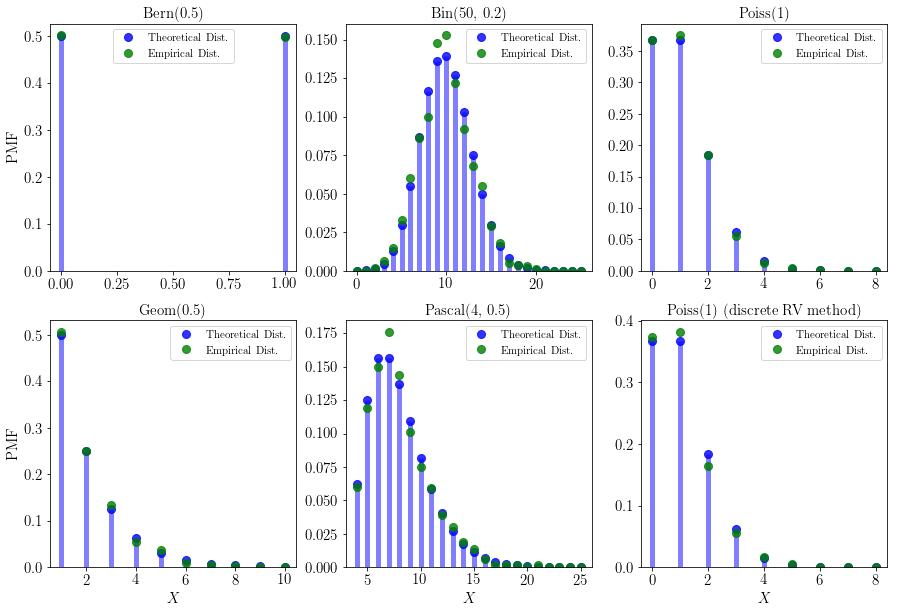

In [856]:
#plot theoretical and empirical PMFs
names = ['Bern(0.5)', 'Bin(50, 0.2)', 'Poiss(1)', 'Geom(0.5)', 'Pascal(4, 0.5)', \
         'Poiss(1) (discrete RV method)']
legend_loc = ['upper right']*6
legend_loc[0] = 'upper center' 

f, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(15, 10))
ax_arr = [ax1, ax2, ax3, ax4, ax5, ax6]

for i, ax in enumerate(ax_arr):
    ax.plot(x_ranges[i], numpy_y[i], 'bo', ms=8, label='Theoretical Dist.', \
            alpha=.8)
    ax.vlines(x_ranges[i], 0, numpy_y[i], colors='b', lw=5, alpha=0.5)
    ax.plot(x_ranges[i], my_y[i], 'bo', ms=8, label='Empirical Dist.', \
            color='green', alpha=.8)
    
    ax.legend(loc=legend_loc[i], fontsize=11)
    ax.set_title(names[i], size = 15)
    ax.set_ylim(ymin=0)
    ax.tick_params(labelsize=15)
    
    if i in [3, 4, 5]:
        ax.set_xlabel('$X$', size = 15)
    if i in [0, 3]:
        ax.set_ylabel('PMF', size = 15)

We see that the empirical distributions match almost perfectly with the theoretical distributions, and even closer correspondence for larger $N$.  

I now check some of the continuous RNG functions I implemented in this chapter.  I first start by computing the theoretical distributions and generating the data.

In [857]:
from scipy.stats import expon, gamma, cauchy, beta, norm

x_ranges = [np.linspace(0, 8, 1000), np.linspace(0, 50, 1000), \
            np.linspace(-20, 20, 1000), np.linspace(0, 1, 1000), \
            np.linspace(0, 15, 1000), np.linspace(-5, 5, 1000)]

#compute PMF arrays for the theoretical distributions
numpy_dists = [expon, gamma, cauchy, beta, gamma, norm]
numpy_args = [[0, 1], [20, 0, 1], [], [2, 4], [5/2, 0, 1], []]
numpy_y = [np_dist.pdf(xrange, *np_args) for np_dist, xrange, np_args in \
           zip(numpy_dists, x_ranges, numpy_args)]

N = 1000 #number of points to sample
# draw random variables from my functions to be plotted as histograms in next cell
my_rngs = [draw_exp, draw_gamma, draw_stand_cauchy, draw_beta_2_4, draw_gamma_2, \
           draw_standard_normal]
my_args = [[1, N], [20, 1, N], [N], [N], [5/2, 1, N], [N]]
my_rvs = [rng(*args) for rng, args in zip(my_rngs, my_args)]

#reset seed
np.random.seed(0)

I now plot normalized histograms of the data and compare to the theoretical distributions.  Again, we see almost perfect correspondence between the empirical and theoretica distributions.  The correspondence becomes even better with larger values of $N$.

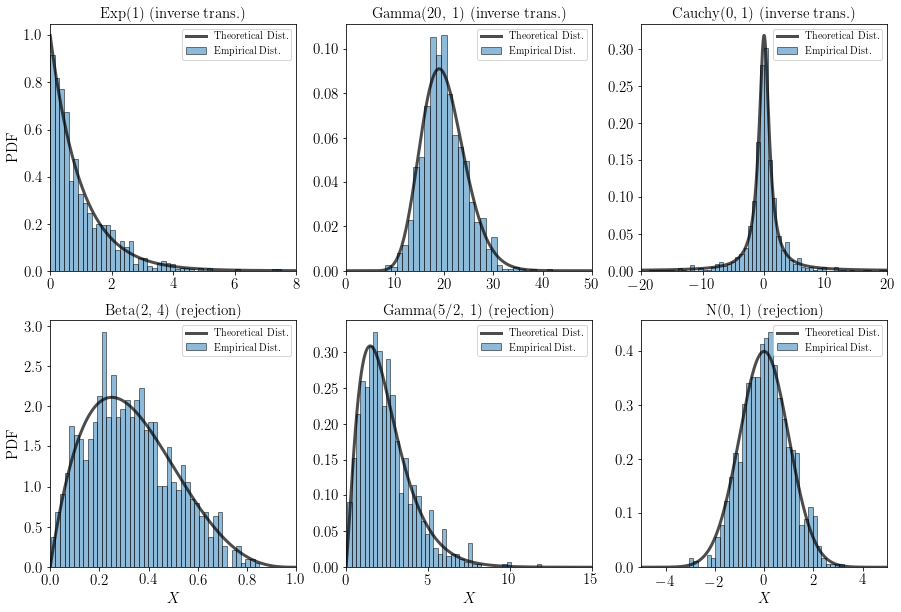

In [858]:
#plot theoretical and empirical PDFs
names = ['Exp(1) (inverse trans.)', 'Gamma(20, 1) (inverse trans.)', \
         'Cauchy(0, 1) (inverse trans.)', 'Beta(2, 4) (rejection)', \
         'Gamma(5/2, 1) (rejection)', 'N(0, 1) (rejection)'] 
bin_arr = [50, 30, 60, 45, 45, 35]
xlims=[(0, 8), (0, 50), (-20, 20), (0, 1), (0, 15), (-5, 5)]
range_arr = [None]*6
range_arr[2] = (-20, 20)

f, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(15, 10))
ax_arr = [ax1, ax2, ax3, ax4, ax5, ax6]

for i, ax in enumerate(ax_arr):
    ax.plot(x_ranges[i], numpy_y[i], label='Theoretical Dist.', color='black', \
            linewidth=3, alpha=.7)
    ax.hist(my_rvs[i], bins=bin_arr[i], alpha=.5, edgecolor='black',normed=True, \
            label='Empirical Dist.', range=range_arr[i])
    
    ax.set_title(names[i], size = 15)
    ax.legend(loc='upper right', fontsize=10)
    ax.set_xlim(xlims[i])
    ax.tick_params(labelsize=15)
    
    if i in [3, 4, 5]:
        ax.set_xlabel('$X$', size = 15)
    if i in [0, 3]:
        ax.set_ylabel('PDF', size = 15)